Code that listens to the microphone, takes in a 5 second chunk, processes it for the model, pushes it through the model, and gets the prediction out.

In [1]:
import keras
from pydub import AudioSegment
from mb_utils import *

from datetime import datetime

import pyaudio
import wave

Using TensorFlow backend.
/anaconda/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
%matplotlib inline

In [3]:
from importlib import reload
import mb_utils

In [4]:
reload(mb_utils)
from mb_utils import *

### initialization: load trained model

In [5]:
#model = keras.models.load_model('trained_models/6880363.h5')
model = keras.models.load_model('trained_models/9722715.h5')

### set up to listen to audio

In [6]:
p = pyaudio.PyAudio()
for ii in range(p.get_device_count()):
    print(p.get_device_info_by_index(ii).get('name'))

Built-in Microphone
Built-in Output


In [7]:
# choose the 'Built-in Microphone'
dev_index = 0

# choose the 'iTalk-02'
#dev_index = 2

In [8]:
# audio settings
form_1 = pyaudio.paInt16 # 16-bit resolution
chans = 1 # 1 channel
samp_rate = 44100 # 44.1kHz sampling rate
chunk = 4096 # 2^12 samples for buffer
record_secs = 5 # seconds to record
dev_index = dev_index # device index found by p.get_device_info_by_index(ii)
#wav_output_filename = 'test1.wav' # name of .wav file

### listen and predict 

Recording...
Clip start: 05/18/2020 21:38:56...   prediction: not_enough.   [0.0002, 0.0000, 0.9998]
Clip start: 05/18/2020 21:39:01...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/18/2020 21:39:06...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/18/2020 21:39:11...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/18/2020 21:39:16...   prediction: not_enough.   [0.0000, 0.0931, 0.9069]
Clip start: 05/18/2020 21:39:21...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/18/2020 21:39:26...   prediction: enough.   [0.1768, 0.8232, 0.0000]
Clip start: 05/18/2020 21:39:31...   prediction: not_enough.   [0.0000, 0.0005, 0.9995]
Clip start: 05/18/2020 21:39:36...   prediction: enough.   [0.0000, 1.0000, 0.0000]
Clip start: 05/18/2020 21:39:41...   prediction: enough.   [0.0002, 0.9998, 0.0000]
Clip start: 05/18/2020 21:39:46...   prediction: enough.   [0.0000, 1.0000, 0.0000]
Clip start: 05/18/2020 21:39:51...   prediction: not_en

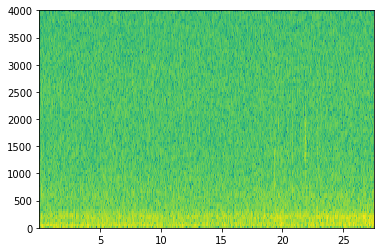

In [193]:
# create pyaudio instantiation
audio = pyaudio.PyAudio() 

# create pyaudio stream
stream = audio.open(format = form_1,rate = samp_rate,channels = chans, \
                    input_device_index = dev_index,input = True, \
                    frames_per_buffer=chunk)


# process five seconds at a time and return predictions
print('Recording...')
for i in range(15):
    pred, preds, now = record_and_process_5_seconds(i, samp_rate, chunk, record_secs, stream,chans, 
                                        form_1, audio, model)


# stop the stream, close it, and terminate the pyaudio instantiation
stream.stop_stream()
stream.close()
print('stream closed.')
audio.terminate()

In [191]:
import IPython

In [192]:
IPython.display.Audio('runtime_temp.wav')

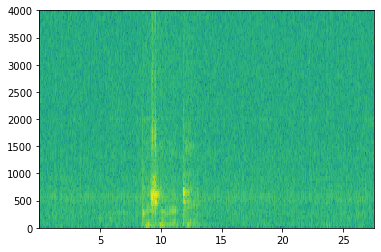

In [15]:
x = graph_spectrogram('runtime_temp.wav')

### practice runtime for 30 minutes

In [9]:
import pandas as pd

In [10]:
pd.set_option('display.max_rows', 500)

In [11]:
n_minutes = 60

In [12]:
filename_to_save = 'runtime-testing/runtime_testing_200531.csv'

In [13]:
# initialize DF to record predictions
pdf = pd.DataFrame([], columns = ['datetime', 'empty', 'enough', 'notenough', 'predictions', 
                                  'enough_chg', 'notenough_chg'])

# initialize params for trigger logic
enough_window = np.zeros(5)
notenough_window = np.zeros(5)

enough_rms = np.zeros(5)
notenough_rms = np.zeros(5)

enough_inc_past = False
notenough_inc_past = False

Recording...
Clip start: 05/31/2020 13:34:24...   prediction: not_enough.   [0.0000, 0.0065, 0.9935]
Clip start: 05/31/2020 13:34:30...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:34:35...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:34:40...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:34:45...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:34:50...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:34:55...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:35:00...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:35:05...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:35:10...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:35:15...   prediction: enough.   [0.0000, 1.0000, 0.0000]
Clip start: 05/31/2020 13:35:20...   prediction: empty.   [1.0000, 0

Clip start: 05/31/2020 13:42:36...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:42:41...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:42:46...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:42:51...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:42:56...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:43:01...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:43:06...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:43:11...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:43:16...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:43:21...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:43:26...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:43:31...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip

Clip start: 05/31/2020 13:50:53...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:50:58...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:51:03...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:51:08...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:51:13...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:51:18...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:51:23...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:51:28...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:51:33...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:51:38...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:51:43...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:51:48...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip

Clip start: 05/31/2020 13:59:04...   prediction: enough.   [0.0000, 1.0000, 0.0000]
Clip start: 05/31/2020 13:59:09...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:59:14...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:59:19...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:59:24...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:59:29...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:59:34...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:59:39...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:59:44...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:59:49...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:59:54...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 13:59:59...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Cli

Clip start: 05/31/2020 14:07:21...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:07:26...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:07:31...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:07:36...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:07:41...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:07:46...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:07:51...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:07:56...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:08:01...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:08:06...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:08:11...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:08:16...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip

Clip start: 05/31/2020 14:15:37...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:15:42...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:15:47...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:15:52...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:15:57...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:16:02...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:16:07...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:16:12...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:16:17...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:16:22...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:16:27...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:16:32...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip

Clip start: 05/31/2020 14:23:54...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:23:59...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:24:04...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:24:09...   prediction: empty.   [0.7570, 0.2430, 0.0000]
Clip start: 05/31/2020 14:24:14...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:24:19...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:24:24...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:24:29...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:24:34...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:24:39...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:24:44...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:24:49...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip

Clip start: 05/31/2020 14:32:10...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:32:15...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:32:20...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:32:25...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:32:30...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:32:35...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:32:40...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:32:45...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:32:50...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:32:55...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:33:00...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 05/31/2020 14:33:05...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip

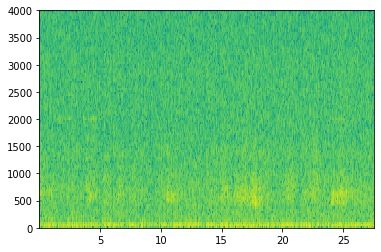

In [14]:
# create pyaudio instantiation
audio = pyaudio.PyAudio() 

# create pyaudio stream
stream = audio.open(format = form_1,rate = samp_rate,channels = chans, \
                    input_device_index = dev_index,input = True, \
                    frames_per_buffer=chunk)


# process five seconds at a time and return predictions
print('Recording...')
for i in range(12*n_minutes):
    pred, preds, now = record_and_process_5_seconds(i, samp_rate, chunk, record_secs, stream,chans, 
                                        form_1, audio, model)
    # calculate rolling average
    enough_window[i%5] = preds[0][1]
    enough_rm = np.mean(enough_window)
    enough_inc_now = (enough_rm - enough_rms[i%5]) > 0.6
    enough_chg = 1 if (enough_inc_now and not enough_inc_past) else 0
    enough_rms[i%5] = enough_rm
    enough_inc_past = enough_inc_now

    notenough_window[i%5] = preds[0][2]
    notenough_rm = np.mean(notenough_window)
    notenough_inc_now = (notenough_rm - notenough_rms[i%5]) > 0.6
    notenough_chg = 1 if (notenough_inc_now and not notenough_inc_past) else 0
    notenough_rms[i%5] = notenough_rm
    notenough_inc_past = notenough_inc_now
    
    if enough_chg:
        print('****** WOULD WRITE enough TO current-prediction.txt *******')
    if notenough_chg:
        print('****** WOULD WRITE not_enough TO current-prediction.txt *******')

    
    tdf = pd.DataFrame([[now, preds[0][0], preds[0][1], preds[0][2], pred, enough_chg, notenough_chg]], 
               columns = ['datetime', 'empty', 'enough', 'notenough', 'predictions', 'enough_chg', 'notenough_chg'])

    pdf = pdf.append(tdf, ignore_index=True)
    if (i+1)%12==0:
        pdf.to_csv(filename_to_save, index=False)

# stop the stream, close it, and terminate the pyaudio instantiation
stream.stop_stream()
stream.close()
print('stream closed.')
audio.terminate()

# save predictions to CSV
pdf.to_csv(filename_to_save, index=False)

In [15]:
pdf.shape

(720, 7)

In [16]:
pdf = pd.read_csv(filename_to_save)

In [17]:
pdf.shape

(720, 7)

In [28]:
pdf.iloc[360:]

,datetime,empty,enough,notenough,predictions,enough_chg,notenough_chg,predictions_ordinal,minutes,empty_rm,enough_rm,notenough_rm,enough_inc,notenough_inc
360,2020-05-31 14:04:30,1.000000e+00,0.000000e+00,0.000000e+00,empty,0,0,0,30.000000,1.000000,0.000000e+00,0.000000e+00,False,False
361,2020-05-31 14:04:35,1.000000e+00,0.000000e+00,0.000000e+00,empty,0,0,0,30.083333,1.000000,0.000000e+00,0.000000e+00,False,False
362,2020-05-31 14:04:40,1.000000e+00,0.000000e+00,0.000000e+00,empty,0,0,0,30.166667,1.000000,0.000000e+00,0.000000e+00,False,False
363,2020-05-31 14:04:45,1.000000e+00,0.000000e+00,0.000000e+00,empty,0,0,0,30.250000,1.000000,0.000000e+00,0.000000e+00,False,False
364,2020-05-31 14:04:50,1.000000e+00,0.000000e+00,0.000000e+00,empty,0,0,0,30.333333,1.000000,0.000000e+00,0.000000e+00,False,False
365,2020-05-31 14:04:55,1.000000e+00,0.000000e+00,0.000000e+00,empty,0,0,0,30.416667,1.000000,0.000000e+00,0.000000e+00,False,False
366,2020-05-31 14:05:00,1.000000e+00,0.000000e+00,0.000000e+00,empty,0,0,0,30.500000,1.000000,0.000000e+00,0.000000e+00,False,False
367,2020-05-31 14:05:05,8.542140e-10,1.104846e-03,9.988952e-01,not_enough,0,0,2,30.583333,0.800000,2.209693e-04,1.997790e-01,False,False
368,2020-05-31 14:05:10,9.997349e-01,2.650415e-04,0.000000e+00,empty,0,0,0,30.666667,0.799947,2.739776e-04,1.997790e-01,False,False
369,2020-05-31 14:05:15,1.000000e+00,0.000000e+00,0.000000e+00,empty,0,0,0,30.750000,0.799947,2.739776e-04,1.997790e-01,False,False


In [19]:
pdf.predictions.value_counts()/len(pdf)

empty         0.940278
enough        0.038889
not_enough    0.020833
Name: predictions, dtype: float64

In [20]:
import seaborn as sns

In [21]:
pdf['datetime'] = pd.to_datetime(pdf['datetime'])

def ordinalize(s):
    if s == 'empty':    
        return 0
    elif s == 'enough':  # krishnamurti
        return 1
    elif s == 'not_enough': # continue
        return 2
    else:
        return 3
pdf['predictions_ordinal'] = pdf['predictions'].apply(ordinalize)

pdf['minutes'] = pdf.index/12

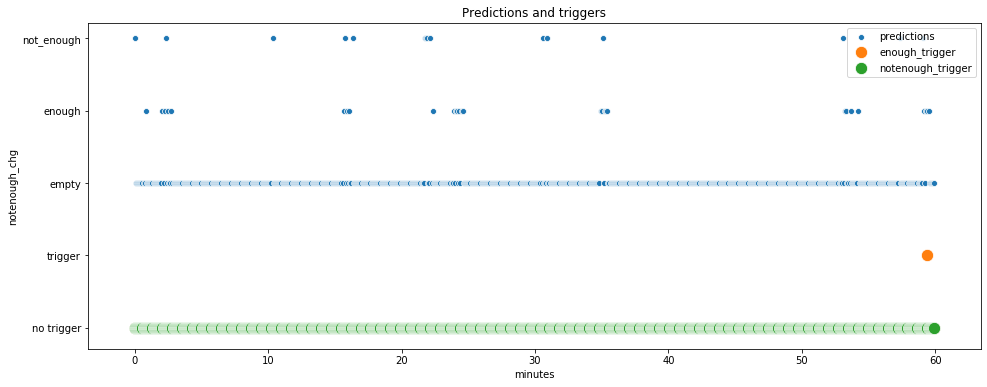

In [22]:
fig = plt.figure(figsize=(16,6))
sns.scatterplot(x = 'minutes', y = 'predictions_ordinal', data=pdf, label='predictions')
#sns.scatterplot(x = 'minutes', y = 'enough_chg', data=pdf, label='enough_trigger', s=150)
sns.scatterplot(x = pdf['minutes'], y = pdf['enough_chg']-2, label='enough_trigger', s=150)
sns.scatterplot(x = pdf['minutes'], y = pdf['notenough_chg']-2, label='notenough_trigger', s=150)
plt.yticks([-2,-1,0,1,2], labels=['no trigger','trigger','empty','enough','not_enough'])
plt.legend()
plt.title('Predictions and triggers')
plt.show()

#### Notes:

- `runtime_testing_200318`: with `6880363.h5`.  does well with 'enough', but is hearing too many 'not_enough'.  Maybe I need to say it a few times for something to trigger?  There was also a lot of banging from the pipe, which might have triggered more 'continue's.

- `runtime_testing_200319`: pretty much same as last one.  even without pipe knocking there were too many continues.
- `runtime_testing_200319`: better than previous 2 runs.  i turned the laptop and sat in the corner near the closet.  pipe was not knocking for first half, but then was for second.  still, much better.  (empty, not_enough, enough) = (87%, 8%, 4%).  Some indication that my phrases were falling between clips... might need to do a buffer, or average.
- `runtime_testing_200516`: didn't think i changed anything, but this one had even more false positives. (empty, not_enough, enough) = (74%, 19%, 7%).  i did possibly turn up the mic input level, b/c this run was using built-in mic but after i fiddled with the new USB mic.
- `runtime_testing_200517`: two minutes, to test out the trigger code
- `runtime_testing_200517a`: 30 minutes. has trigger code that you can plot.
- `runtime_testing_200525`: with `9722715.h5`. (empty, not_enough, enough) = (92%, 5.5%, 2.5%).  said each phrase 6 times, but maybe didn't wait 5 secs.  got the enough triggers really well, but no not_enough triggers.
- `runtime_testing_200531`: same as previous.  ran for 60 minutes.  missed most triggers because i paused too long in between.

In [23]:
for colm in ['empty', 'enough', 'notenough']:
    pdf[colm+'_rm'] = pdf[colm].rolling(window=5).mean()

pdf = pdf.fillna(0)

In [24]:
pdf['enough_inc'] = (pdf['enough_rm'] - pdf['enough_rm'].shift(5, fill_value=0)) > 0.6
pdf['enough_chg'] = ((pdf['enough_inc']==True)&(pdf['enough_inc'].shift(1, fill_value=False)==False)).astype('int')

In [25]:
pdf['notenough_inc'] = (pdf['notenough_rm'] - pdf['notenough_rm'].shift(5, fill_value=0)) > 0.6
pdf['notenough_chg'] = ((pdf['notenough_inc']==True)&(pdf['notenough_inc'].shift(1, fill_value=False)==False)).astype('int')

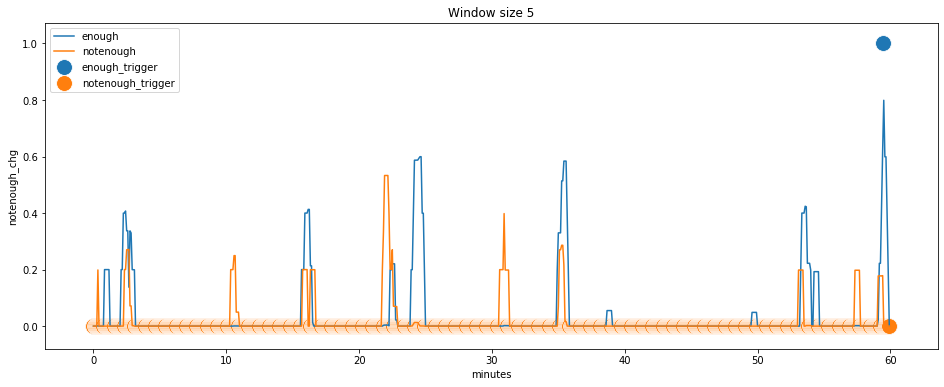

In [26]:
fig = plt.figure(figsize=(16, 6))
sns.lineplot(x='minutes', y='enough_rm', data=pdf, label='enough')
sns.lineplot(x='minutes', y='notenough_rm', data=pdf, label='notenough')
sns.scatterplot(x='minutes', y='enough_chg', data=pdf, label='enough_trigger', s=250)
sns.scatterplot(x='minutes', y='notenough_chg', data=pdf, label='notenough_trigger', s=250)
plt.legend()
plt.title('Window size 5')
plt.show()

In [184]:
pdf.head(100)

,datetime,empty,enough,notenough,predictions,enough_chg,notenough_chg,predictions_ordinal,minutes,empty_rm,enough_rm,notenough_rm,enough_inc,notenough_inc
0,2020-05-17 15:05:43,1.000000e+00,0.000000e+00,3.078835e-35,empty,0,0,0,0.000000,0.000000,0.000000e+00,0.000000e+00,False,False
1,2020-05-17 15:05:48,1.000000e+00,0.000000e+00,3.257683e-35,empty,0,0,0,0.083333,0.000000,0.000000e+00,0.000000e+00,False,False
2,2020-05-17 15:05:53,1.000000e+00,9.322704e-37,0.000000e+00,empty,0,0,0,0.166667,0.000000,0.000000e+00,0.000000e+00,False,False
3,2020-05-17 15:05:58,2.081889e-03,9.975344e-01,3.837400e-04,enough,0,0,1,0.250000,0.000000,0.000000e+00,0.000000e+00,False,False
4,2020-05-17 15:06:03,1.000000e+00,4.824372e-12,8.311021e-11,empty,0,0,0,0.333333,0.800416,1.995069e-01,7.674802e-05,False,False
5,2020-05-17 15:06:08,4.099940e-01,5.900015e-01,4.504285e-06,enough,0,0,1,0.416667,0.682415,3.175072e-01,7.764887e-05,False,False
6,2020-05-17 15:06:13,1.000000e+00,1.829572e-19,8.506540e-29,empty,0,0,0,0.500000,0.682415,3.175072e-01,7.764887e-05,False,False
7,2020-05-17 15:06:18,8.936793e-01,7.538349e-12,1.063208e-01,empty,0,0,0,0.583333,0.661151,3.175072e-01,2.134180e-02,False,False
8,2020-05-17 15:06:24,1.000000e+00,2.964216e-38,0.000000e+00,empty,0,0,0,0.666667,0.860735,1.180003e-01,2.126506e-02,False,False
9,2020-05-17 15:06:29,1.000000e+00,8.462359e-37,0.000000e+00,empty,0,0,0,0.750000,0.860735,1.180003e-01,2.126506e-02,False,False


#### check other window sizes

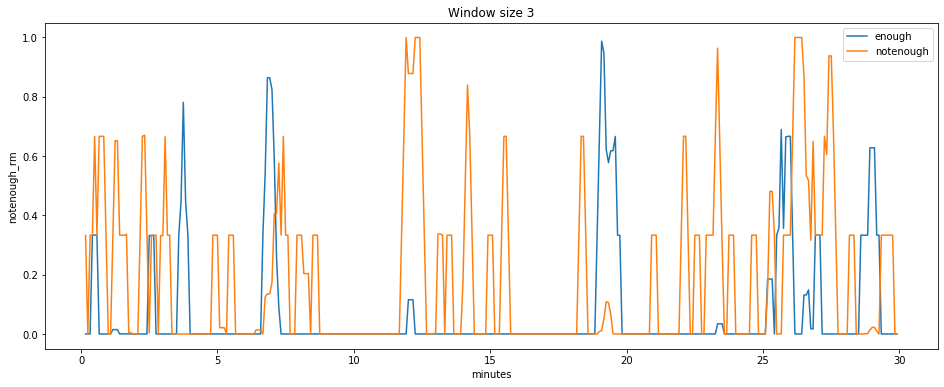

In [49]:
fig = plt.figure(figsize=(16, 6))
#sns.lineplot(x='minutes', y='empty_rm', data=pdf, label='empty')
sns.lineplot(x='minutes', y='enough_rm', data=pdf, label='enough')
sns.lineplot(x='minutes', y='notenough_rm', data=pdf, label='notenough')
plt.legend()
plt.title('Window size 3')
plt.show()

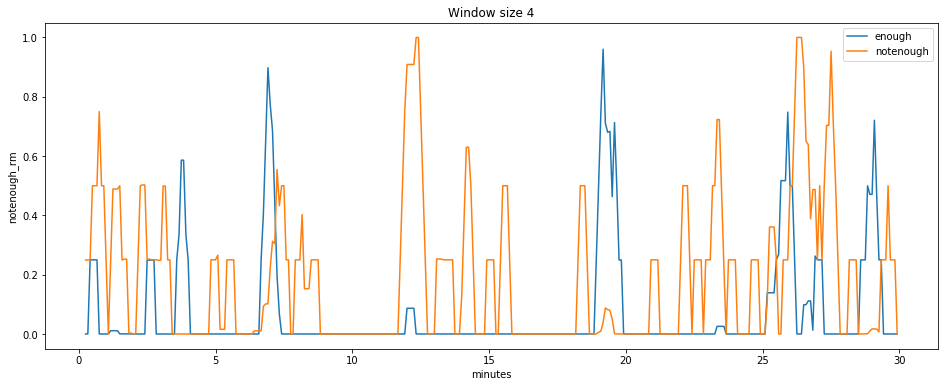

In [47]:
fig = plt.figure(figsize=(16, 6))
#sns.lineplot(x='minutes', y='empty_rm', data=pdf, label='empty')
sns.lineplot(x='minutes', y='enough_rm', data=pdf, label='enough')
sns.lineplot(x='minutes', y='notenough_rm', data=pdf, label='notenough')
plt.legend()
plt.title('Window size 4')
plt.show()

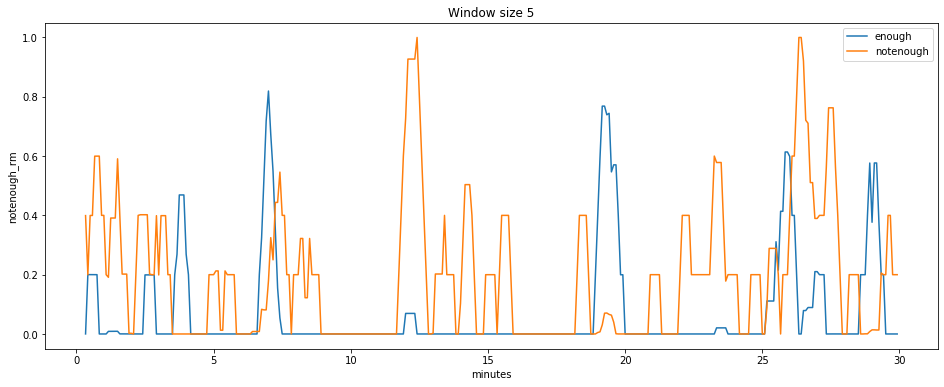

In [51]:
fig = plt.figure(figsize=(16, 6))
#sns.lineplot(x='minutes', y='empty_rm', data=pdf, label='empty')
sns.lineplot(x='minutes', y='enough_rm', data=pdf, label='enough')
sns.lineplot(x='minutes', y='notenough_rm', data=pdf, label='notenough')
plt.legend()
plt.title('Window size 5')
plt.show()

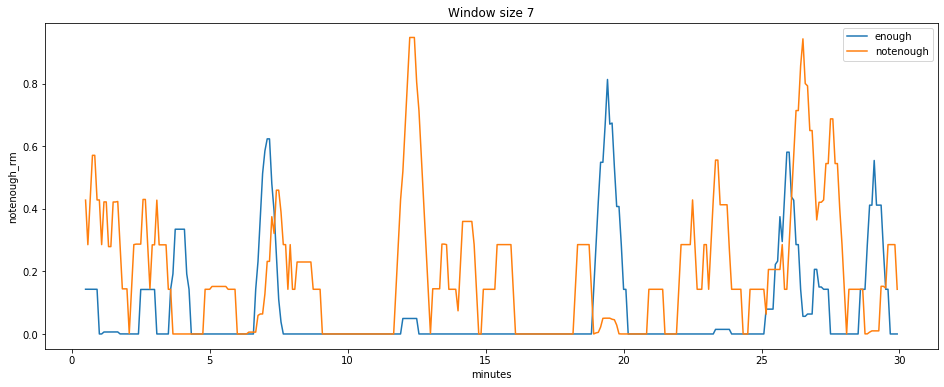

In [53]:
fig = plt.figure(figsize=(16, 6))
#sns.lineplot(x='minutes', y='empty_rm', data=pdf, label='empty')
sns.lineplot(x='minutes', y='enough_rm', data=pdf, label='enough')
sns.lineplot(x='minutes', y='notenough_rm', data=pdf, label='notenough')
plt.legend()
plt.title('Window size 7')
plt.show()

### practice runtime: listen to microphone and get a 5-second audio chunk, then predict on it

'not_enough'

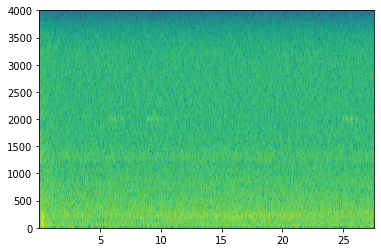

In [7]:
# for now, read in a sample WAV file
filename = 'runtime_temp.wav'

# clean up to make sure it is in correct format. saves it to runtime_temp.wav.
preprocess_runtime_clip(filename)

# feed current clip to model and get prediction
pred = run_model_on_clip(model, 'runtime_temp.wav')
pred